<a href="https://colab.research.google.com/github/dhavalsimaria/MachineLearning/blob/master/NITW/DL%20%26%20AI/DL_%26_AI_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model
from keras.models import model_from_json

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
NUM_FEATURES = 64
NUM_LABELS = 7
BATCH_SIZE = 64
EPOCHS = 20
WIDTH, HEIGHT = 48, 48

In [56]:
!wget https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv

--2020-04-12 14:49:29--  https://www.dropbox.com/s/n8bninud94blch4/fer2013.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/n8bninud94blch4/fer2013.csv [following]
--2020-04-12 14:49:30--  https://www.dropbox.com/s/raw/n8bninud94blch4/fer2013.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4b7f4fedfde19316ad551eeb51.dl.dropboxusercontent.com/cd/0/inline/A1uHk8zH7ghjJp9Xb21E1PnK0k7wNiRbkMEgJ9z5wXRXpebm2jBicFTGVE8FaVSUEKBn8UADf3JsolgZfizQmOy5GDcnVYbFldeCMXcyJvfUJbAzS1wXJuIHcfbfbANZKAc/file# [following]
--2020-04-12 14:49:30--  https://uc4b7f4fedfde19316ad551eeb51.dl.dropboxusercontent.com/cd/0/inline/A1uHk8zH7ghjJp9Xb21E1PnK0k7wNiRbkMEgJ9z5wXRXpebm2jBicFTGVE8FaVSUEKBn8UADf3JsolgZfizQmOy5GDcnVYbFldeCMXcyJvfUJbAzS1

In [0]:
emotions_df = pd.read_csv("fer2013.csv")

In [58]:
emotions_df.head(5)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Getting features for training

In [0]:
datapoints = emotions_df['pixels'].tolist()

X = []
for xsequence in datapoints:
    xx = [int(xp) for xp in xsequence.split(' ')]
    xx = np.asarray(xx).reshape(WIDTH, HEIGHT)
    X.append(xx.astype('float32'))

In [0]:
X = np.asarray(X)
X = np.expand_dims(X, -1)

Getting Labels for training

In [0]:
y = pd.get_dummies(emotions_df['emotion'])

In [62]:
print("Number of Features: "+str(len(X[0])))
print("Number of Labels: "+ str(len(y[0])))
print("Number of examples in dataset:"+str(len(X)))

Number of Features: 48
Number of Labels: 35887
Number of examples in dataset:35887


In [0]:
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
np.save('modytest', y_test)

In [0]:
model = Sequential()

Layer: 1

In [67]:
model.add(Conv2D(NUM_FEATURES, kernel_size=(5, 5), activation='relu', input_shape=(WIDTH, HEIGHT, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(NUM_FEATURES, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Layer: 2

In [0]:
model.add(Conv2D(2*NUM_FEATURES, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*NUM_FEATURES, kernel_size=(5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

Layer: 3

In [0]:
model.add(Conv2D(2*2*NUM_FEATURES, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*NUM_FEATURES, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

Layer: 4

In [0]:
model.add(Flatten())

model.add(Dense(2*2*2*NUM_FEATURES, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*NUM_FEATURES, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*NUM_FEATURES, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(NUM_LABELS, activation='softmax'))

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 128)      

Compiling the model with Adam Optimizer and Categorical Cross-Entropy loss

In [0]:
model.compile(loss=categorical_crossentropy,
              optimizer = Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

Training the model

In [73]:
model.fit(np.array(X_train), np.array(y_train),
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          shuffle=True)

Epoch 1/20
32298/32298 [==============================] - 29s 892us/step - loss: 2.0254 - accuracy: 0.2230
Epoch 2/20
32298/32298 [==============================] - 29s 889us/step - loss: 1.8121 - accuracy: 0.2555
Epoch 3/20
32298/32298 [==============================] - 29s 891us/step - loss: 1.7138 - accuracy: 0.3106
Epoch 4/20
32298/32298 [==============================] - 29s 893us/step - loss: 1.6119 - accuracy: 0.3663
Epoch 5/20
32298/32298 [==============================] - 29s 899us/step - loss: 1.5313 - accuracy: 0.4004
Epoch 6/20
32298/32298 [==============================] - 29s 900us/step - loss: 1.4785 - accuracy: 0.4232
Epoch 7/20
32298/32298 [==============================] - 29s 901us/step - loss: 1.4411 - accuracy: 0.4431
Epoch 8/20
32298/32298 [==============================] - 29s 901us/step - loss: 1.4006 - accuracy: 0.4573
Epoch 9/20
32298/32298 [==============================] - 29s 904us/step - loss: 1.3779 - accuracy: 0.4724
Epoch 10/20
32298/32298 [============

Saving the model

In [0]:
model.save_weights("AI&DL assignment-2 model.h5")

Predict using the trained model

In [0]:
true_y=[]
pred_y=[]

y = np.load('modytest.npy')
y_pred= model.predict(X_test)
y_pred_list = y_pred.tolist()
y_test_list = y.tolist()
count = 0

for i in range(len(y_test)):
    yy = max(y_pred_list[i])
    yyt = max(y_test_list[i])
    pred_y.append(y_pred_list[i].index(yy))
    true_y.append(y_test_list[i].index(yyt))
    if(y_pred_list[i].index(yy)== y_test_list[i].index(yyt)):
        count+=1

Draw Confusion Matrix

In [0]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

[[211   0  21  28 169   5  64]
 [ 28   0   2   2  17   1   2]
 [ 86   0  73  37 244  43  62]
 [ 23   0   5 746  61   9  37]
 [ 34   0   5  25 409   1 114]
 [ 17   0  53  42  31 248  23]
 [ 10   0   3  37 175   1 385]]


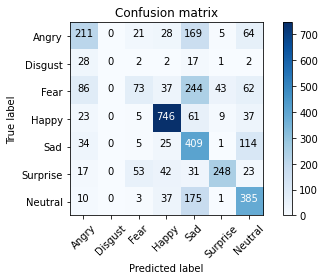

In [77]:
cm = confusion_matrix(true_y, pred_y)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

Convert the saved model to .pb model

In [0]:
import tensorflow as tf
#from keras import backend as K

In [0]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    from tensorflow.python.framework.graph_util import convert_variables_to_constants
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.compat.v1.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.compat.v1.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.compat.v1.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [93]:
sess = tf.compat.v1.keras.backend.get_session()
frozen_graph = freeze_session(sess, output_names=[out.op.name for out in model.outputs])

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 137 variables.
INFO:tensorflow:Converted 137 variables to const ops.


In [97]:
tf.compat.v1.train.write_graph(frozen_graph, "./", "AI&DL assignment-2 model.pb", as_text=False)

'./AI&DL assignment-2 model.pb'